# Data
## ChEMBL v.28
This notebook exploits ChEMBL data, more specifically the curated version available on openkinome, see https://github.com/openkinome/kinodata/releases/tag/v0.2 .

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

Retrieve data from [openkinome](https://github.com/openkinome/kinodata).

In [2]:
path = "https://github.com/openkinome/kinodata/releases/download/\
v0.2/activities-chembl28_v0.2.zip"

data = pd.read_csv(path)
print(f"Shape of data: {data.shape}")

Shape of data: (186972, 17)


In [3]:
data.head()

,Unnamed: 0,activities.activity_id,assays.chembl_id,target_dictionary.chembl_id,molecule_dictionary.chembl_id,molecule_dictionary.max_phase,activities.standard_type,activities.standard_value,activities.standard_units,compound_structures.canonical_smiles,compound_structures.standard_inchi,component_sequences.sequence,assays.confidence_score,docs.chembl_id,docs.year,docs.authors,UniprotID
0,96251,16291323,CHEMBL3705523,CHEMBL2973,CHEMBL3666724,0,pIC50,14.096910,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C31H33N7O3/c1-2-4-29(40)33-22-6-3-5-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
1,97672,16306943,CHEMBL3705523,CHEMBL2973,CHEMBL1968705,0,pIC50,14.000000,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C31H33N7O2/c1-2-6-29(39)33-23-8-5-7-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
2,93879,16264754,CHEMBL3705523,CHEMBL2973,CHEMBL3666728,0,pIC50,14.000000,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C34H40N8O3/c1-5-7-32(43)36-24-9-6-8-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
3,100714,16340050,CHEMBL3705523,CHEMBL2973,CHEMBL1997433,0,pIC50,13.958607,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C28H28N6O3/c1-3-5-26(35)30-20-7-4-6-1...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116
4,95877,16287186,CHEMBL3705523,CHEMBL2973,CHEMBL3666721,0,pIC50,13.920819,nM,CCCC(=O)Nc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3cc(O...,InChI=1S/C32H35N7O2/c1-2-7-30(40)34-24-9-6-8-2...,MSRPPPTGKMPGAPETAPGDGAGASRQRKLEALIRDPRSPINVESL...,9,CHEMBL3639077,2014.0,NaN,O75116


Drop NA values in important columns.

In [4]:
data = data.dropna(
    subset=[
        "compound_structures.canonical_smiles",
        "component_sequences.sequence",
        "activities.standard_type",
    ]
)

Look at the type of activity and the associated units.

In [5]:
print(f"Activities: {set(data['activities.standard_type'])}\n"
      f"Units: {set(data['activities.standard_units'])}")

Activities: {'pKi', 'pKd', 'pIC50'}
Units: {'nM'}


Let's keep the entries which have pIC50 values.

In [6]:
data = data[data["activities.standard_type"] == "pIC50"]

Let's look at the number of different Uniprot IDS.

In [7]:
print(f"Number of unique uniprot IDs: {len(set(data['UniprotID']))}")

Number of unique uniprot IDs: 432


Look at the 3 kinases with the most entries.

In [8]:
unitprot_ids = Counter(data["UniprotID"])
print(f" 3 most common uniprot IDs:\n{unitprot_ids.most_common()[0:3]}")

 3 most common uniprot IDs:
[('P35968', 7734), ('P00533', 6026), ('O60674', 4415)]


- VGRF is uniprot ID P35968, see https://www.uniprot.org/uniprot/P35968

- EGRF is uniprot ID P00533, see  https://www.uniprot.org/uniprot/P00533

Let's consider the EGFR kinase.

In [9]:
data = data[data["UniprotID"] == "P00533"]
print(f"Shape of data: {data.shape}")

Shape of data: (6026, 17)


Keep necessary columns, rename them and reset index.

In [10]:
data = data[["compound_structures.canonical_smiles",
             "activities.standard_value"]]
data = data.rename(columns={"compound_structures.canonical_smiles": "smiles"})
data = data.reset_index(drop=True)
data.head()

,smiles,activities.standard_value
0,Brc1cccc(Nc2ncnc3cc4ccccc4cc23)c1,11.522879
1,CCOc1cc2ncnc(Nc3cccc(Br)c3)c2cc1OCC,11.221849
2,CN(C)c1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.221849
3,Brc1cccc(Nc2ncnc3cc4[nH]cnc4cc23)c1,11.096910
4,CNc1cc2c(Nc3cccc(Br)c3)ncnc2cn1,11.096910


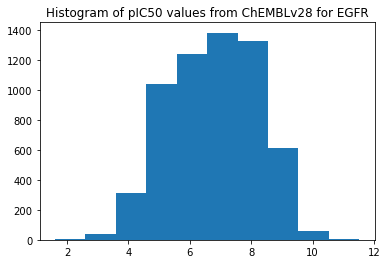

In [11]:
plt.hist(data["activities.standard_value"])
plt.title("Histogram of pIC50 values from ChEMBLv28 for EGFR")
plt.show()